In [19]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import constants
import sympy as sy

### J-Values Question
Below, we find the J value where the highest energy occurs by plotting a graph of J values versus their associated Rotational Energy Boltzman Factor. I created a new function rot_energy which calculated the Boltman factor for a particular value J. I then create an array of values from 0 to 40 for J and plotted their associated Boltzman factor along with it. 

We find that the largest Energy occurs at $J=9$.

No handles with labels found to put in legend.


The highest energy occurs at J = 9


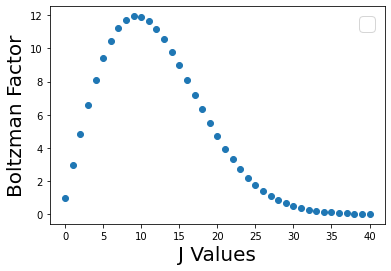

In [20]:
moment = 2.6e-46 # Moment of Interia for N2 which was found online
n2_bondlength = 1.09e-10 # Bondlength 
n2_reduced = (14*14)/(14+14)*1.66054e-27 # calculated reduced mass of N_2

e = 2.71828 # Value of Euler's number
def rot_energy(temperature,J): # takes in temperature and J value, returns the Boltzman factor. Included degeneracy too
    return (2*J +1)*e**(-(J*(J+1)*constants.hbar**2)/(2*moment*constants.Boltzmann*temperature))


J_values = np.linspace(0,40,41) # values of J

# Plots the graph showing where the highest J value occurs
plt.scatter(J_values,rot_energy(300,J_values))
plt.xlabel("J Values",fontsize=20)
plt.ylabel("Boltzman Factor",fontsize=20)
plt.legend(fontsize=20)

print("The highest energy occurs at J =", rot_energy(300,J_values).argmax())


### 4-25
We use python as a glorified calculator to do this problem. Main things to note:

We define two new functions, char_vib which calculates the Charactistic Vibrational Values all at once, and the Molar Heat Capacity which will take in the inputs of char_vib to find the Molar Heat Capacity of a given molecule. The results can be seen below! 

In [21]:
x_COM = (1.67e-27*(0)+1.99e-26*(106e-12)+1.99e-26*(106e-12+120.3e-12)+1.67e-27*(106e-12+106e-12+120.3e-12))/(2*(1.67e-27)+(1.99e-26)*2) # Calculate the center of mass for Acetylene
print("Here is our calculated center of mass of Acetylene: ",x_COM)

# Below we calculate the moment of Acetylene using the Center of Mass we calculated. 
moment_acetylene = (1.67e-27)*(166e-12)**2+(1.67e-27)*(2*(106e-12)+(120.3e-12)-(166e-12))**2+1.99e-26*((166e-12)-(106e-12))**2+1.99e-26*((106e-12)+(120.3e-12)-(166e-12))**2
print("Here is our calculated moment of interia for Acetylene: ",moment_acetylene)

# Rotataional Value is calculated below! 
rotational_constant = constants.h**2/(8*constants.pi**2*moment_acetylene*constants.Boltzmann)

print("Here is our calculated rotational constant: ", rotational_constant)

Here is our calculated center of mass of Acetylene:  1.6615000000000002e-10
Here is our calculated moment of interia for Acetylene:  2.3620171329999997e-46
Here is our calculated rotational constant:  1.7051241299941151


In [22]:
"""
Function: char_vib (Characteristic Vibrational)
Input: Vibrational Constants in m^{-1}
Output: Characteristic Vibrational Values given formula provided in Latex Writeup
"""
def char_vib(vib_constant):
    return (constants.Planck*constants.c*vib_constant/(constants.Boltzmann))

vibrational_constants = np.array([197500,337000,327700,72900,60000]) # Vibrational Constants for N2

print("Here are the Characteristic Vibrational Values: ", char_vib(vibrational_constants))
gen_values = np.array([1,1,1,2,2]) # Generacy Values provided for N2


"""
Function: molar_Cv (Molar Heat Capacity)
Input: temperature (K), vib_constant (array), generacy
Output: Integar, Molar Heat Capacity
"""
def molar_Cv(temperture,vib_constant,generacy):
    molar_Cv = 3/2 + 1 # Initialized with the following integar values
    i = 0 # Index for generacy array
    for vib in vib_constant: # Loop through the values within the vibrational constants array
        molar_Cv = molar_Cv + generacy[i]*((vib/temperture)**2 * math.exp(-vib/temperture)/((1-math.exp(-vib/temperture))**2))
        i = i + 1
    return molar_Cv

print("Here is the molar Heat Capacity for Acetylene: ", molar_Cv(300,char_vib(vibrational_constants),gen_values), " R")

Here are the Characteristic Vibrational Values:  [2841.58433307 4848.67807719 4714.87182758 1048.8683437   863.2661265 ]
Here is the molar Heat Capacity for Acetylene:  4.34140535538732  R


C:\Users\death\AppData\Local\Temp/ipykernel_21228/3352675034.py:4: RuntimeWarning: overflow encountered in power
  return (3*e**(-788100*constants.c*constants.Planck/(constants.Boltzmann*T))*(788100*constants.c*constants.Planck)**2)/(constants.Boltzmann*(T+3*T*e**(-788100*constants.c*constants.Planck/(constants.Boltzmann*T))**2))
C:\Users\death\AppData\Local\Temp/ipykernel_21228/3352675034.py:4: RuntimeWarning: overflow encountered in multiply
  return (3*e**(-788100*constants.c*constants.Planck/(constants.Boltzmann*T))*(788100*constants.c*constants.Planck)**2)/(constants.Boltzmann*(T+3*T*e**(-788100*constants.c*constants.Planck/(constants.Boltzmann*T))**2))
No handles with labels found to put in legend.


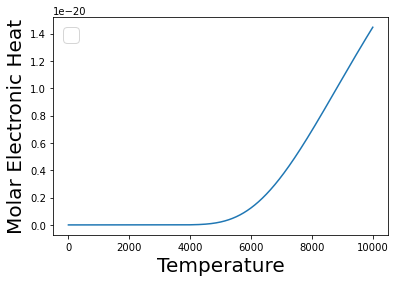

In [30]:
e = 2.71828
E1 = 7881
def elect_energy(T):
    return (3*e**(-788100*constants.c*constants.Planck/(constants.Boltzmann*T))*(788100*constants.c*constants.Planck)**2)/(constants.Boltzmann*(T+3*T*e**(-788100*constants.c*constants.Planck/(constants.Boltzmann*T))**2))

temp = np.linspace(1,10000,10000)

plt.plot(temp, elect_energy(temp))
plt.xlabel("Temperature",fontsize=20)
plt.ylabel("Molar Electronic Heat",fontsize=20)
plt.legend(fontsize=20)